In [1]:
sys.path.append('../')
import src.vimlts_utils_keras as VIMLTS_utils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
tfd=tfp.distributions

# Load stored variables

In [2]:
%store -r

# Get the lambdas

In [3]:
def get_lambdas_for_w(layer_weights, from_neuron_layer_bevore, to_neuron):
    """
        Gets the variational parameter for a specific weight
    """  
    try:
        num_param=14
        lambdas=[]
        
        for j in range(int(num_param)):
            lambdas.append(layer_weights[j][from_neuron_layer_bevore][to_neuron])
        return lambdas
    except:
        print("Constellation not existing")


def get_lambdas_for_bias(layer_weights, neuron):
    """
        Gets the variational parameter for a specific bias
    """  
    try:
        num_param=14
        lambdas=[]
 
        for j in range(num_param,num_param*2):
            lambdas.append(layer_weights[j][neuron])
        return lambdas
    except:
        print("Constellation not existing")

## Get the lambdas for a weight

Valid values for the 03_smal_and_shallow_networks experiment:

**weights**

|`layer`|1|2|
|--|--|--|
| `from_neuron_layer_bevore` |0|0-2|
|`to_neuron`|0-2|0|

In [4]:
layer=2
from_neuron_layer_bevore=1
to_neuron=0

# Get the variational parameters of the model
if(layer==1):
    layer_weights=lambdas_VIMLTS_03_shallow_layer_1
elif(layer==2):
    layer_weights=lambdas_VIMLTS_03_shallow_layer_2

lambdas_w=get_lambdas_for_w(layer_weights=layer_weights,from_neuron_layer_bevore=from_neuron_layer_bevore,to_neuron=to_neuron)

## Get the lambdas for a bias

Valid values for the 03_smal_and_shallow_networks experiment:


**bias**

|`layer`|1|2|
|--|--|--|
| `neuron`| 0-2 |0|

In [13]:
layer=2
neuron=0

# Get the variational parameters of the model
if(layer==1):
    layer_weights=lambdas_VIMLTS_03_shallow_layer_1
elif(layer==2):
    layer_weights=lambdas_VIMLTS_03_shallow_layer_2

lambdas_b=get_lambdas_for_bias(layer_weights=layer_weights,neuron=neuron)

# Get the densities

In [6]:
# Get the variatioal distributions
distribution_w=VIMLTS_utils.get_target_dist(lambdas_w)
distribution_b=VIMLTS_utils.get_target_dist(lambdas_b)

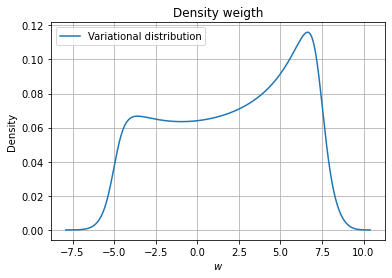

In [15]:
plt.figure()
plt.plot(distribution_w[1],distribution_w[0],label=r"Variational distribution")
#plt.plot(np.linspace(-4,4,500),tfd.Normal(loc=0,scale=1).prob(np.linspace(-4,4,500)),label=r"Prior")
plt.legend()
plt.grid()
plt.ylabel(r"Density")
plt.xlabel(r"$w$")
plt.title(r"Density weigth");

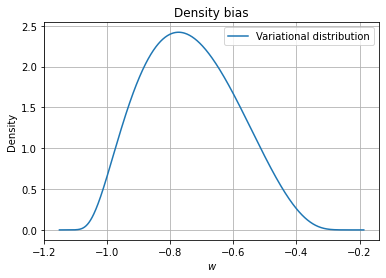

In [14]:
plt.figure()
plt.plot(distribution_b[1],distribution_b[0],label=r"Variational distribution")
#plt.plot(np.linspace(-4,4,500),tfd.Normal(loc=0,scale=1).prob(np.linspace(-4,4,500)),label=r"Prior")
plt.legend()
plt.grid()
plt.ylabel(r"Density")
plt.xlabel(r"$w$")
plt.title(r"Density bias");

# Get samples

In [9]:
num_samples=20000

# Samples for the weight
samples_w=np.zeros(num_samples)
a=VIMLTS_utils.to_a(lambdas_w[0:1])
b=lambdas_w[1:2]
theta=VIMLTS_utils.to_theta(lambdas_w[2:12])
alpha=VIMLTS_utils.to_alpha(lambdas_w[12:13])
beta=lambdas_w[13:14]
beta_dist=VIMLTS_utils.init_beta_dist(10)


for i in range(num_samples):
    z=tfd.Normal(loc=0,scale=1).sample()
    samples_w[i]=VIMLTS_utils.h_z2w(z=z,a=a,b=b,theta=theta,alpha=alpha,beta=beta,beta_dist=beta_dist)

# Samples for the bias
samples_b=np.zeros(num_samples)
a=VIMLTS_utils.to_a(lambdas_b[0:1])
b=lambdas_b[1:2]
theta=VIMLTS_utils.to_theta(lambdas_b[2:12])
alpha=VIMLTS_utils.to_alpha(lambdas_b[12:13])
beta=lambdas_b[13:14]


for i in range(num_samples):
    z=tfd.Normal(loc=0,scale=1).sample()
    samples_b[i]=VIMLTS_utils.h_z2w(z=z,a=a,b=b,theta=theta,alpha=alpha,beta=beta,beta_dist=beta_dist)

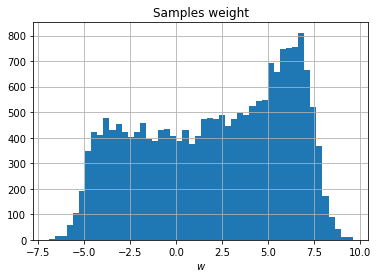

In [16]:
plt.figure()
plt.hist(samples_w,bins=50)
plt.grid()
plt.xlabel(r"$w$")
plt.title(r"Samples weight");

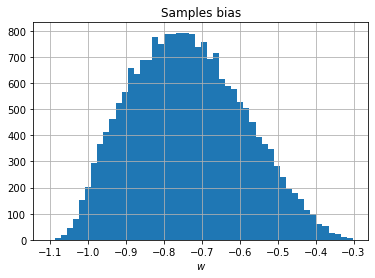

In [17]:
plt.figure()
plt.hist(samples_b,bins=50)
plt.grid()
plt.xlabel(r"$w$")
plt.title(r"Samples bias");